In [29]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import accuracy_score
import seaborn as sns

## Basic checks

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### This shows there is no null value or empty data in our dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Standardization must be don't becuase our data is not in same scale

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Checking the correlation of the features

In [12]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### This shows there is high imbalance data

<AxesSubplot:xlabel='quality', ylabel='count'>

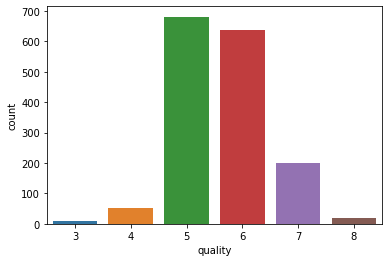

In [15]:
sns.countplot(x=data["quality"]) # Since we know "quality" is our target/dependent feature

## Lets jump in and try to classify/predict the quality of win

### Let's try to perform a simple SVC on the dataset

In [16]:
# splitting independent and dependent variable
X=data.drop('quality',axis=1)
y=data['quality']

In [17]:
#checking the shape
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [20]:
# Test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1071, 11)
(528, 11)
(1071,)
(528,)


In [24]:
# standardizing the data to bring all the feature in the same scale
scaler = StandardScaler()

In [25]:
#calculate the mean and std dev
scaler.fit(X_train)
X_train_tf=scaler.transform(X_train)
X_test_tf=scaler.transform(X_test)

In [26]:
# Training the model
model = SVC()
model.fit(X_train_tf,y_train)

SVC()

In [27]:
#training accuracy
model.score(X_train_tf,y_train)

0.6778711484593838

In [30]:
#test accuracy
y_predict= model.predict(X_test_tf)
print(accuracy_score(y_test,y_predict))

0.5984848484848485


#### We have only got around 60% test accuracy and 67% train accuracy let ous try to improve it but using techniques like grid sreach cv

## What is grid search cv:
#### A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. However, there are some parameters, known as Hyperparameters and those cannot be directly learned. They are commonly chosen by humans based on some intuition or hit and trial before the actual training begins. These parameters exhibit their importance by improving the performance of the model such as its complexity or its learning rate. Models can have many hyper-parameters and finding the best combination of parameters can be treated as a search problem.

#### SVM also has some hyper-parameters (like what C or gamma values to use) and finding optimal hyper-parameter is a very hard task to solve. But it can be found by just trying all combinations and see what parameters work best. The main idea behind it is to create a grid of hyper-parameters and just try all of their combinations.

#### GridSearchCV takes a dictionary that describes the parameters that could be tried on a model to train it. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [32]:
# You can go ahead and try to add addition value and try in different kernels
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 

In [33]:
grid = GridSearchCV(SVC(), param_grid, verbose = 3)

In [34]:
grid.fit(X_train_tf, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.433 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.430 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.530 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [35]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [37]:
# Training accuracy
grid.score(X_train_tf,y_train)

0.9990662931839402

In [40]:
# Test accuracy
y_predict_grid= grid.predict(X_test_tf)
print(accuracy_score(y_test,y_predict_grid))

0.6287878787878788


#### This surely have a increase in accuracy but this kind of over fitted our data becuase test accuracy is very much low when compare to the train accuracy

## Now lets try to do some sampling inorder to handle our imbalance data and apply grid search cv over it.

### We are going to perform SMOTE-Tomek Links sampling here (ref :- https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc)

In [42]:
# performing sampling
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
sampled_X, sampled_y = resample.fit_resample(X, y)

In [44]:
# Checking the shape
print(sampled_X.shape)
print(sampled_y.shape)

(4082, 11)
(4082,)


In [46]:
# Since our dataset shape has changed we have to perform train/test split again
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(sampled_X, sampled_y, test_size=0.33, random_state=42)

In [47]:
# Appling standardization on our new sampled dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train_tf_sm=scaler.transform(X_train_sm)
X_test_tf_sm=scaler.transform(X_test_sm)

In [48]:
# Applying grid search with SVC on top of sampled data
grid.fit(X_train_tf_sm, y_train_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.698 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.647 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.644 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.623 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.521 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [50]:
# Training accuracy
grid.score(X_train_tf_sm,y_train_sm)

0.9989027066569129

In [51]:
# Training accuracy
y_predict_grid_sm= grid.predict(X_test_tf_sm)
accuracy_score(y_test_sm,y_predict_grid_sm)

0.8516320474777448

## We have increated the test accuracy from 59% to 85% by using sampling and grid search with SVC

#### use full resources - https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#### sampling - https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc
#### sampling implementation reference - https://www.aitude.com/multiclass-classification-on-highly-imbalanced-dataset/